# Machine Learning Project : Forest Fire
The aim is to predict the burned area of forest in the northeast region of Portugal. 
Data Set Obtained From: https://archive.ics.uci.edu/ml/datasets/
Forest+Fires
The notebook analyzes the dataset using Linear Regression, Multivariate Regression and KNN Regression. 

# Reading the data and importing dependencies.

# Part A

In [1]:
import csv
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from numpy import arange
import seaborn as sb
import statistics
import math
import itertools 
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import metrics
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
%matplotlib inline


data =pd.read_csv('forestfires.csv', sep=',')
print(data[:11])

C:\Users\ZUBIN\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\ZUBIN\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


    X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  area
0   7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.0
1   7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.0
2   7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.0
3   8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.0
4   8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.0
5   8  6   aug  sun  92.3   85.3  488.0  14.7  22.2  29   5.4   0.0   0.0
6   8  6   aug  mon  92.3   88.9  495.6   8.5  24.1  27   3.1   0.0   0.0
7   8  6   aug  mon  91.5  145.4  608.2  10.7   8.0  86   2.2   0.0   0.0
8   8  6   sep  tue  91.0  129.5  692.6   7.0  13.1  63   5.4   0.0   0.0
9   7  5   sep  sat  92.5   88.0  698.6   7.1  22.8  40   4.0   0.0   0.0
10  7  5   sep  sat  92.5   88.0  698.6   7.1  17.8  51   7.2   0.0   0.0


# Part B (i)
There seem to be 517 instances with 12 attributes and one result attribute.
   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec" 
   4. day - day of the week: "mon" to "sun"
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 

# PART B (ii)

In [2]:
type(data['area'])
data['area'] = np.log((1 + data['area']))
    
print(data[:10])

   X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.0
5  8  6   aug  sun  92.3   85.3  488.0  14.7  22.2  29   5.4   0.0   0.0
6  8  6   aug  mon  92.3   88.9  495.6   8.5  24.1  27   3.1   0.0   0.0
7  8  6   aug  mon  91.5  145.4  608.2  10.7   8.0  86   2.2   0.0   0.0
8  8  6   sep  tue  91.0  129.5  692.6   7.0  13.1  63   5.4   0.0   0.0
9  7  5   sep  sat  92.5   88.0  698.6   7.1  22.8  40   4.0   0.0   0.0


As the description states the model skews towards the 0.0 a logaithmic transform might be a possible way to normailze the data and reduce the redundancy caused by the skew towards 0.0
The log transformation can be used to make highly skewed distributions less skewed. This can be valuable both for making patterns in the data more interpretable and for helping to meet the assumptions of inferential statistics.
It can be used to increase or reduce the skew or normalize the data
In this case the data which on a scatter plot would have huddled up on the left due to the range and data points being unproportionate will now be spread out on the plot due normalization.

# PART B (iii)

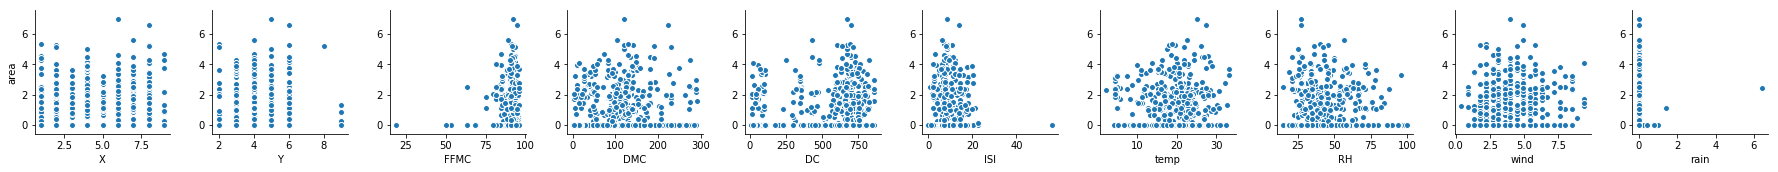

In [3]:
pp = sb.pairplot(data = data,y_vars=['area'],x_vars=['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain'])

1. X and Y need to be carefully observed as they are cordinates, and they only show the currently burnt area.
2. FFMC,DMC,DC,ISI - FWI, indexes (forest fire weather index). ISI and FFMC are not evenly distributed hence they can be said to have an important role in the fire as compared to the rest which seem to be by-products of the fire.
3. Wind seems to have made an even impact on the fire. 
4. Rain seems to have the least co-relation with fire. 

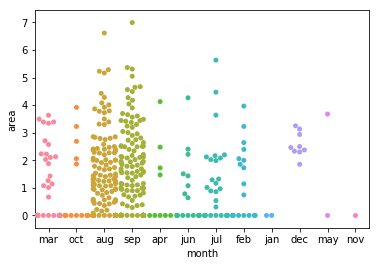

In [4]:
sp = sb.swarmplot(x = "month", y = "area",data = data)


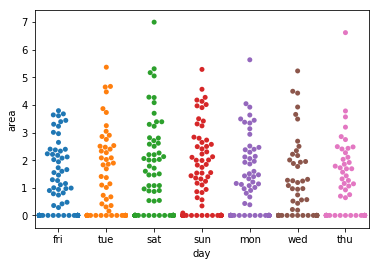

In [5]:
sp1 = sb.swarmplot(x = "day", y = "area",data = data)

From the above plot it seems that the forest fire was maximum in the month of august and september. The days that fire was maximum seems to be saturday and sunday.

# PART B (iv)

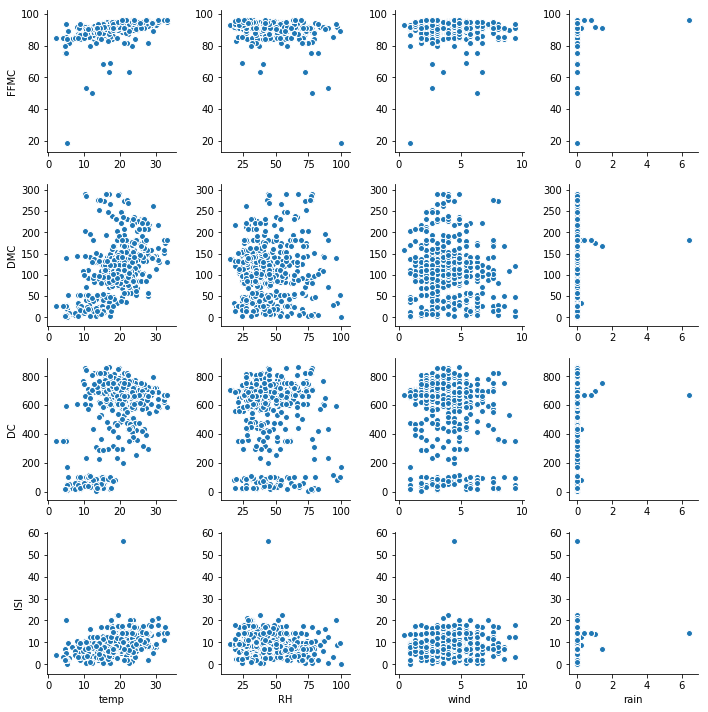

In [6]:
pp = sb.pairplot(data = data,y_vars=['FFMC','DMC','DC','ISI'],x_vars=['temp','RH','wind','rain'])

# PART B (v)

In [7]:
description = data.describe()
mean = pd.DataFrame(description.ix[1])
med = pd.DataFrame.median(data)
ranges = pd.DataFrame(description.loc['max'] - description.loc['min'])
first = pd.DataFrame(description.ix[4])
third = pd.DataFrame(description.ix[6])
iqr = pd.DataFrame(description.loc['75%'] - description.loc['25%'])
table = pd.concat([mean,med,first,third,ranges,iqr,],axis = 1)
table.columns = ['mean','median','first','third','ranges','iqr']
print (table)

            mean     median  first       third     ranges         iqr
X       4.669246    4.00000    3.0    7.000000    8.00000    4.000000
Y       4.299807    4.00000    4.0    5.000000    7.00000    1.000000
FFMC   90.644681   91.60000   90.2   92.900000   77.50000    2.700000
DMC   110.872340  108.30000   68.6  142.400000  290.20000   73.800000
DC    547.940039  664.20000  437.7  713.900000  852.70000  276.200000
ISI     9.021663    8.40000    6.5   10.800000   56.10000    4.300000
temp   18.889168   19.30000   15.5   22.800000   31.10000    7.300000
RH     44.288201   42.00000   33.0   53.000000   85.00000   20.000000
wind    4.017602    4.00000    2.7    4.900000    9.00000    2.200000
rain    0.021663    0.00000    0.0    0.000000    6.40000    0.000000
area    1.111026    0.41871    0.0    2.024193    6.99562    2.024193


C:\Users\ZUBIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


# PART C

In [8]:
#feature set
# Preffered to use Label Encoder as opposed to One-Hot encoding to stop from having increased dimensionality 
#One hot codoing did not lead to any significant change in result and ols model will by default
#give results in one-hot encoded format.
lb_make = LabelEncoder()
data["month_val"] = lb_make.fit_transform(data["month"])
data["day_val"] = lb_make.fit_transform(data["day"])
print(data[:10])

   X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  area  \
0  7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.0   
1  7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.0   
2  7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.0   
3  8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.0   
4  8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.0   
5  8  6   aug  sun  92.3   85.3  488.0  14.7  22.2  29   5.4   0.0   0.0   
6  8  6   aug  mon  92.3   88.9  495.6   8.5  24.1  27   3.1   0.0   0.0   
7  8  6   aug  mon  91.5  145.4  608.2  10.7   8.0  86   2.2   0.0   0.0   
8  8  6   sep  tue  91.0  129.5  692.6   7.0  13.1  63   5.4   0.0   0.0   
9  7  5   sep  sat  92.5   88.0  698.6   7.1  22.8  40   4.0   0.0   0.0   

   month_val  day_val  
0          7        0  
1         10        5  
2         10        2  
3          7        0  
4          7        3  
5          1       

In [9]:
reg = linear_model.LinearRegression()
predictors = data.drop(labels=['area','month','day'],axis = 1)
target = data.area
x_train,x_test,y_train,y_test =train_test_split(predictors,target,test_size = 0.2,random_state = 4)

Intercept    0.936072
X            0.037469
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.987
Date:                Sat, 03 Feb 2018   Prob (F-statistic):              0.159
Time:                        19:18:56   Log-Likelihood:                -905.47
No. Observations:                 517   AIC:                             1815.
Df Residuals:                     515   BIC:                             1823.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

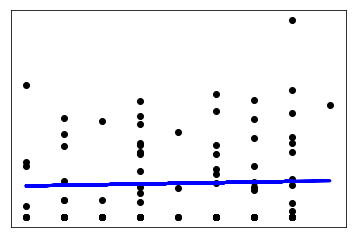

In [10]:
# X and Area
#stat
lmx_stat = smf.ols(formula = 'area ~ X ',data = data).fit()
print(lmx_stat.params)
print(lmx_stat.summary())
#sklearn
model_x_a = reg.fit((x_train.X).values.reshape(-1,1),y_train)
a = model_x_a.predict((x_test.X).values.reshape(-1,1))
print('Coefficients: \n', model_x_a.coef_)
xhold = model_x_a.coef_
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, a))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, a))
# Plot outputs
plt.scatter(x_test.X, y_test,  color='black')
plt.plot(x_test.X, a, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

Intercept    0.921145
Y            0.044160
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7780
Date:                Sat, 03 Feb 2018   Prob (F-statistic):              0.378
Time:                        19:18:58   Log-Likelihood:                -906.08
No. Observations:                 517   AIC:                             1816.
Df Residuals:                     515   BIC:                             1825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

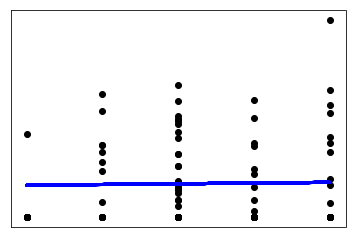

In [11]:
# Y and Area
#stat
lmy_stat = smf.ols(formula = 'area ~ Y',data = data).fit()
print(lmy_stat.params)
print(lmy_stat.summary())
#sklearn
model_y_a = reg.fit((x_train.Y).values.reshape(-1,1),y_train)
a = model_x_a.predict((x_test.Y).values.reshape(-1,1))
print('Coefficients: \n', model_y_a.coef_)
yhold = model_y_a.coef_
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, a))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, a))
# Plot outputs
plt.scatter(x_test.Y, y_test,  color='black')
plt.plot(x_test.Y, a, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

Intercept    1.037421
month_val    0.012783
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8243
Date:                Sat, 03 Feb 2018   Prob (F-statistic):              0.364
Time:                        19:19:00   Log-Likelihood:                -906.06
No. Observations:                 517   AIC:                             1816.
Df Residuals:                     515   BIC:                             1825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

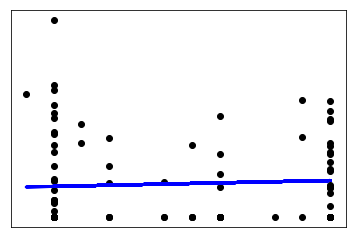

In [12]:
# month_val and Area
#stat
lmm_stat = smf.ols(formula = 'area ~ month_val',data = data).fit()
print(lmm_stat.params)
print(lmm_stat.summary())
#sklearn
model_m_a = reg.fit((x_train.month_val).values.reshape(-1,1),y_train)
a = model_m_a.predict((x_test.month_val).values.reshape(-1,1))
print('Coefficients: \n', model_m_a.coef_)
mhold = model_m_a.coef_
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, a))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, a))
# Plot outputs
plt.scatter(x_test.month_val, y_test,  color='black')
plt.plot(x_test.month_val, a, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

Intercept    1.053741
day_val      0.020930
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4279
Date:                Sat, 03 Feb 2018   Prob (F-statistic):              0.513
Time:                        19:19:00   Log-Likelihood:                -906.25
No. Observations:                 517   AIC:                             1817.
Df Residuals:                     515   BIC:                             1825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

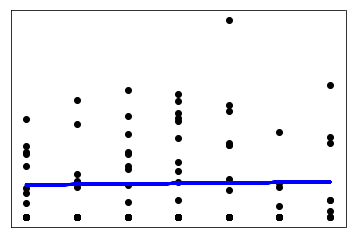

In [13]:
# day_val and Area
lmd_stat = smf.ols(formula = 'area ~ day_val',data = data).fit()
print(lmd_stat.params)
print(lmd_stat.summary())
#sklearn
model_d_a = reg.fit((x_train.day_val).values.reshape(-1,1),y_train)
a = model_d_a.predict((x_test.day_val).values.reshape(-1,1))
print('Coefficients: \n', model_d_a.coef_)
dhold = model_d_a.coef_
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, a))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, a))
# Plot outputs
plt.scatter(x_test.day_val, y_test,  color='black')
plt.plot(x_test.day_val, a, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

Intercept    0.036369
FFMC         0.011856
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.130
Date:                Sat, 03 Feb 2018   Prob (F-statistic):              0.288
Time:                        19:19:01   Log-Likelihood:                -905.90
No. Observations:                 517   AIC:                             1816.
Df Residuals:                     515   BIC:                             1824.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

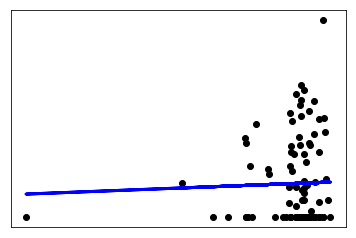

In [14]:
# ffmc and Area
lmf_stat = smf.ols(formula = 'area ~ FFMC',data = data).fit()
print(lmf_stat.params)
print(lmf_stat.summary())
#sklearn
model_f_a = reg.fit((x_train.FFMC).values.reshape(-1,1),y_train)
a = model_m_a.predict((x_test.FFMC).values.reshape(-1,1))
print('Coefficients: \n', model_f_a.coef_)
fhold = model_f_a.coef_
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, a))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, a))
# Plot outputs
plt.scatter(x_test.FFMC, y_test,  color='black')
plt.plot(x_test.FFMC, a, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

Intercept    0.948458
DMC          0.001466
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.333
Date:                Sat, 03 Feb 2018   Prob (F-statistic):              0.127
Time:                        19:19:02   Log-Likelihood:                -905.30
No. Observations:                 517   AIC:                             1815.
Df Residuals:                     515   BIC:                             1823.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

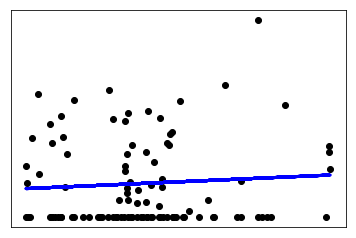

In [15]:
# dmc and Area
lmdm_stat = smf.ols(formula = 'area ~ DMC',data = data).fit()
print(lmdm_stat.params)
print(lmdm_stat.summary())
#sklearn
model_dm_a = reg.fit((x_train.DMC).values.reshape(-1,1),y_train)
a = model_dm_a.predict((x_test.DMC).values.reshape(-1,1))
print('Coefficients: \n', model_dm_a.coef_)
dmhold = model_dm_a.coef_
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, a))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, a))
# Plot outputs
plt.scatter(x_test.DMC, y_test,  color='black')
plt.plot(x_test.DMC, a, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

Intercept    0.906045
DC           0.000374
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.278
Date:                Sat, 03 Feb 2018   Prob (F-statistic):              0.132
Time:                        19:19:03   Log-Likelihood:                -905.33
No. Observations:                 517   AIC:                             1815.
Df Residuals:                     515   BIC:                             1823.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

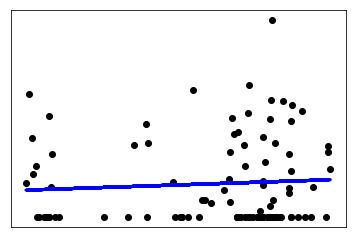

In [16]:
# dc and Area
lmdc_stat = smf.ols(formula = 'area ~ DC',data = data).fit()
print(lmdc_stat.params)
print(lmdc_stat.summary())
#sklearn
model_dc_a = reg.fit((x_train.DC).values.reshape(-1,1),y_train)
a = model_dc_a.predict((x_test.DC).values.reshape(-1,1))
print('Coefficients: \n', model_dc_a.coef_)
dchold = model_dc_a.coef_
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, a))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, a))
# Plot outputs
plt.scatter(x_test.DC, y_test,  color='black')
plt.plot(x_test.DC, a, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

Intercept    1.139656
ISI         -0.003173
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.05514
Date:                Sat, 03 Feb 2018   Prob (F-statistic):              0.814
Time:                        19:19:04   Log-Likelihood:                -906.44
No. Observations:                 517   AIC:                             1817.
Df Residuals:                     515   BIC:                             1825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

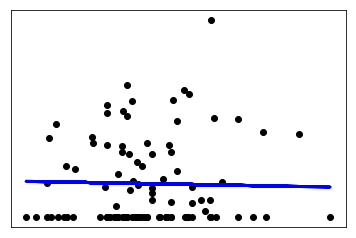

In [17]:
# isi and Area
lmi_stat = smf.ols(formula = 'area ~ ISI',data = data).fit()
print(lmi_stat.params)
print(lmi_stat.summary())
#sklearn
model_i_a = reg.fit((x_train.ISI).values.reshape(-1,1),y_train)
a = model_m_a.predict((x_test.ISI).values.reshape(-1,1))
print('Coefficients: \n', model_i_a.coef_)
ihold = model_i_a.coef_
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, a))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, a))
# Plot outputs
plt.scatter(x_test.ISI, y_test,  color='black')
plt.plot(x_test.ISI, a, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

Intercept    0.867707
temp         0.012881
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.478
Date:                Sat, 03 Feb 2018   Prob (F-statistic):              0.225
Time:                        19:19:04   Log-Likelihood:                -905.73
No. Observations:                 517   AIC:                             1815.
Df Residuals:                     515   BIC:                             1824.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

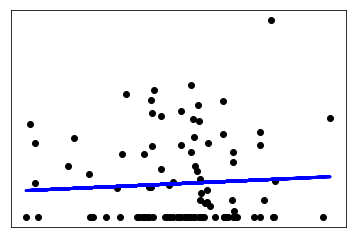

In [18]:
# temp and Area
lmt_stat = smf.ols(formula = 'area ~ temp',data = data).fit()
print(lmt_stat.params)
print(lmt_stat.summary())
#sklearn
model_t_a = reg.fit((x_train.temp).values.reshape(-1,1),y_train)
a = model_m_a.predict((x_test.temp).values.reshape(-1,1))
print('Coefficients: \n', model_t_a.coef_)
thold = model_t_a.coef_
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, a))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, a))
# Plot outputs
plt.scatter(x_test.temp, y_test,  color='black')
plt.plot(x_test.temp, a, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

Intercept    1.314705
RH          -0.004599
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.487
Date:                Sat, 03 Feb 2018   Prob (F-statistic):              0.223
Time:                        19:19:06   Log-Likelihood:                -905.72
No. Observations:                 517   AIC:                             1815.
Df Residuals:                     515   BIC:                             1824.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

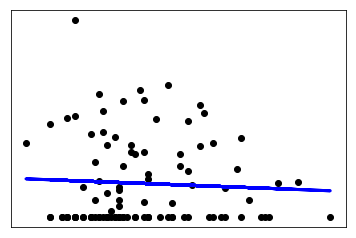

In [19]:
# rh and Area
lmrh_stat = smf.ols(formula = 'area ~ RH',data = data).fit()
print(lmrh_stat.params)
print(lmrh_stat.summary())
#sklearn
model_rh_a = reg.fit((x_train.RH).values.reshape(-1,1),y_train)
a = model_rh_a.predict((x_test.RH).values.reshape(-1,1))
print('Coefficients: \n', model_rh_a.coef_)
rhhold = model_rh_a.coef_
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, a))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, a))
# Plot outputs
plt.scatter(x_test.RH, y_test, color='black')
plt.plot(x_test.RH, a, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

Intercept    0.901007
wind         0.052275
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.320
Date:                Sat, 03 Feb 2018   Prob (F-statistic):              0.128
Time:                        19:19:06   Log-Likelihood:                -905.31
No. Observations:                 517   AIC:                             1815.
Df Residuals:                     515   BIC:                             1823.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

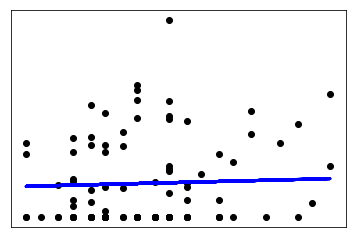

In [20]:
# wind and Area
lmw_stat = smf.ols(formula = 'area ~ wind',data = data).fit()
print(lmw_stat.params)
print(lmw_stat.summary())
#sklearn
model_w_a = reg.fit((x_train.wind).values.reshape(-1,1),y_train)
a = model_w_a.predict((x_test.wind).values.reshape(-1,1))
print('Coefficients: \n', model_w_a.coef_)
whold = model_w_a.coef_
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, a))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, a))
# Plot outputs
plt.scatter(x_test.wind, y_test, color='black')
plt.plot(x_test.wind, a, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

Intercept    1.108640
rain         0.110148
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2800
Date:                Sat, 03 Feb 2018   Prob (F-statistic):              0.597
Time:                        19:19:07   Log-Likelihood:                -906.33
No. Observations:                 517   AIC:                             1817.
Df Residuals:                     515   BIC:                             1825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

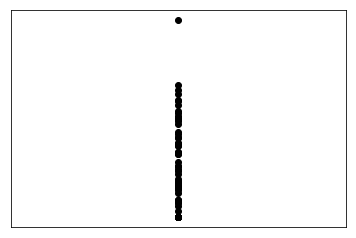

In [21]:
# rain and Area
lmra_stat = smf.ols(formula = 'area ~ rain',data = data).fit()
print(lmra_stat.params)
print(lmra_stat.summary())
#sklearn
model_ra_a = reg.fit((x_train.rain).values.reshape(-1,1),y_train)
a = model_ra_a.predict((x_test.rain).values.reshape(-1,1))
print('Coefficients: \n', model_ra_a.coef_)
rahold = model_ra_a.coef_
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, a))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, a))
# Plot outputs
plt.scatter(x_test.rain, y_test,  color='black')
plt.plot(x_test.rain, a, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

Yes, Each and every predictor has atleast one value that can be classified as an outlier, this can be observed by looking at the scatter plot. 

# PART D

0.362152508335
                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.207
Date:                Sat, 03 Feb 2018   Prob (F-statistic):              0.275
Time:                        19:19:14   Log-Likelihood:                -899.15
No. Observations:                 517   AIC:                             1824.
Df Residuals:                     504   BIC:                             1880.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1171      1.389     

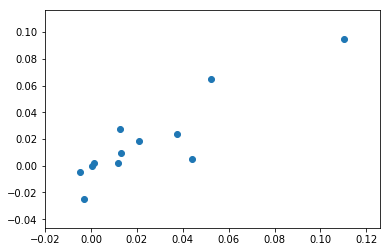

In [22]:
#All predictors intact
lm = reg.fit(x_train,y_train)
y_pred = lm.predict(x_test)
print(lm.intercept_)
#list(zip(train_x, lm.coef_))
lm_stat = smf.ols(formula = 'area ~ X + Y + month_val + day_val + FFMC + DMC + DC + ISI + temp + RH + wind + rain',data = data).fit()
lm_stat.params
print(lm_stat.summary())
coeffecient = lm.coef_
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
y = lm.coef_
x = [lmx_stat.params.X,lmy_stat.params.Y,lmf_stat.params.FFMC,lmdm_stat.params.DMC,lmdc_stat.params.DC,lmi_stat.params.ISI,lmt_stat.params.temp,lmrh_stat.params.RH,lmw_stat.params.wind,lmra_stat.params.rain,lmm_stat.params.month_val,lmd_stat.params.day_val,]
print (x)
print (y)
plt.scatter(x,y)
plt.show()



1. It can be noted that all the predictors have a non-significant p value. Except wind null value hypothesis cannont be rejected for any of the given predictors.

# PART E

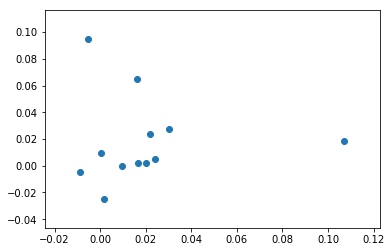

In [23]:
e_lotx = [xhold,yhold,mhold,dhold,fhold,dmhold,dchold,ihold,thold,rhhold,whold,rahold]
flattened = [val for sublist in e_lotx for val in sublist]
e_loty = lm.coef_
plt.scatter(e_lotx,e_loty)
plt.show()


# PART F

In [24]:
temp_data = pd.DataFrame()
temp_data = data
temp_data = temp_data.drop(labels = ['day','month'],axis = 1)
for heads in temp_data.columns:
    parameter = heads
    print(parameter)
    new_data = pd.DataFrame()
    new_data ['single'] = temp_data[parameter]
    new_data['squared'] = (temp_data[parameter]**2)
    new_data['cubed'] = (temp_data[parameter]**3)
    new_data['area'] = (temp_data['area'])
    lmass_stat = smf.ols(formula = 'area ~ single + squared + cubed',data = new_data).fit()
    lmass_stat.params
    print(lmass_stat.summary())
    


X
                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.281
Date:                Sat, 03 Feb 2018   Prob (F-statistic):              0.280
Time:                        19:19:19   Log-Likelihood:                -904.54
No. Observations:                 517   AIC:                             1817.
Df Residuals:                     513   BIC:                             1834.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2981      0.433      2.999      0

strong multicollinearity or other numerical problems.
DC
                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.126
Date:                Sat, 03 Feb 2018   Prob (F-statistic):              0.338
Time:                        19:19:19   Log-Likelihood:                -904.77
No. Observations:                 517   AIC:                             1818.
Df Residuals:                     513   BIC:                             1835.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

# PART G

In [25]:
alpha = []
s = ""
final_alpha = []
temp_holder = []
alpha = data.columns
alpha = alpha.drop(labels=['area','month_val','day_val'])
combs=itertools.combinations(alpha, 2)
comb_list = [ list(t) for t in combs ]
for i in range(0, len(comb_list)):
    holder = "*".join(comb_list[i])
    temp_holder.append(holder)
for j in range (0,len(temp_holder)):
    s+=str(temp_holder[j])
    s+= str("+")

s= s[:-1]    
lmgk_stat = smf.ols(formula = 'area ~ {} '.format(s),data = data).fit()
lmgk_stat.params
print(lmgk_stat.summary())
print ("The following pairs had a significant interaction month_val & day_val , month_val & FFMC, day_val & DC, day_val & DMC, month_val & DC, month_val & ISI, DC & temp, DC & RH  ")

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.9767
Date:                Sat, 03 Feb 2018   Prob (F-statistic):              0.572
Time:                        19:19:25   Log-Likelihood:                -761.91
No. Observations:                 517   AIC:                             1974.
Df Residuals:                     292   BIC:                             2930.
Df Model:                         224                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

C:\Users\ZUBIN\Anaconda3\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\ZUBIN\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\ZUBIN\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\ZUBIN\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


# PART H

In [31]:
new_dataset = pd.DataFrame()
new_dataset = data
new_dataset = new_dataset.drop(labels = ['X','Y','rain','wind'], axis = 1)
new_dataset['month_val&day_val'] = (data.month_val * data.day_val)
new_dataset['month_val&FFMC'] = (data.month_val * data.FFMC)
new_dataset['day_val&DMC'] = (data.day_val * data.DMC)
new_dataset['month_val&DC'] = (data.month_val * data.DC)
new_dataset['month_val&ISI'] = (data.month_val * data.ISI)
new_dataset['DCtemp'] = (data.DC * data.temp) 
new_dataset['day_valDC'] = (data.day_val * data.DC)
new_dataset['DCRH'] = (data.DC * data.RH) 

lmgk_stat = smf.ols(formula = 'area ~ FFMC + DMC + DC + ISI + temp + RH + month_val + day_val + month_val&day_val + month_val&FFMC + day_valDC + day_val&DMC + month_val&DC + month_val&ISI+ DCtemp + DCRH ',data = new_dataset).fit()
lmgk_stat.params
print(lmgk_stat.summary())

new_target = new_dataset.area
new_predictor = new_dataset.drop(labels =['area', 'day', 'month'], axis = 1)
ntrain_errors = list()
ntest_errors = list()
x_ntrain,x_ntest,y_ntrain,y_ntest =train_test_split(new_predictor,new_target,test_size = 0.3,random_state = 4)
olsmod = sm.OLS(y_ntrain, x_ntrain)
olsres = olsmod.fit()
print(olsres.summary)
ypredtest = olsres.predict(x_ntest)
ypredtrain = olsres.predict(x_ntrain)
ntrain_errors.append(mean_squared_error(ypredtrain,y_ntrain))
ntest_errors.append(mean_squared_error(ypredtest,y_ntest))

print ("Below are the value of train and test errors")
print(ntrain_errors,ntest_errors)



                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9815
Date:                Sat, 03 Feb 2018   Prob (F-statistic):              0.471
Time:                        19:20:58   Log-Likelihood:                -899.49
No. Observations:                 517   AIC:                             1829.
Df Residuals:                     502   BIC:                             1893.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

# PART I (i)

[1.4006838899162579, 1.3820576693224691, 1.5974521102948527, 1.689899917439349, 1.7142546589949943, 1.7633011201968751] [3.8989290647733719, 2.5958913290122259, 2.4241408926749299, 2.4379547609430321, 2.3754333826054821, 2.4154061430870124]


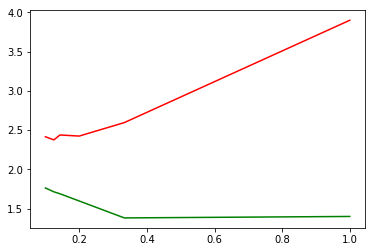

The best value of the result comes when k is 3


In [27]:
#KNN Regression using first four predictors
x_train_ff = x_train.drop(labels=['FFMC','DMC','DC','ISI','temp','RH','wind','rain'],axis = 1)
y_train_ff = y_train
x_test_ff = x_test.drop(labels=['FFMC','DMC','DC','ISI','temp','RH','wind','rain'],axis = 1)
y_test_ff = y_test
train_errors = list()
test_errors =list()
klist = [1,3,5,7,8,10]
for k in klist:
    neigh = KNeighborsRegressor(k)
    neigh.fit(x_train_ff,y_train_ff)
    y_pred_train = neigh.predict(x_train_ff)
    y_pred_test = neigh.predict(x_test_ff)    
    train_errors.append(mean_squared_error(y_pred_train,y_train_ff))
    test_errors.append(mean_squared_error(y_pred_test,y_test_ff))

print(train_errors,test_errors)

onebyklist=[1,1/3,1/5,1/7,1/8,1/10]
plt.plot(onebyklist, train_errors,'g')
plt.plot(onebyklist, test_errors,'r')
plt.show()

print ("The best value of the result comes when k is 3")

# PART I (ii)

[0.10835255906611749, 1.2009509634356696, 1.4958197308437269, 1.6426257484617186, 1.6918711767384016, 1.7311152684277418] [3.2431991406540286, 2.2124657237671528, 2.0743826902520275, 1.9736847303427383, 2.0519402430983487, 2.1929295651433867]


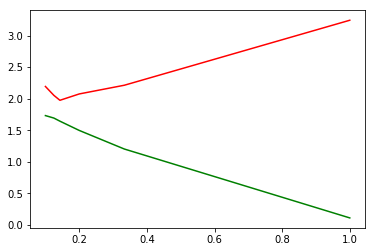

The value of K that gives the best result is 1


In [28]:
#KNN Regression using last four predictors
x_train_ff = x_train.drop(labels=['FFMC','DMC','DC','ISI','X','Y','day_val','month_val'],axis = 1)
y_train_ff = y_train
x_test_ff = x_test.drop(labels=['FFMC','DMC','DC','ISI','X','Y','day_val','month_val'],axis = 1)
y_test_ff = y_test
train_errors = list()
test_errors =list()
klist = [1,3,5,7,8,10]
for k in klist:
    neigh = KNeighborsRegressor(k)
    neigh.fit(x_train_ff,y_train_ff)
    y_pred_train = neigh.predict(x_train_ff)
    y_pred_test = neigh.predict(x_test_ff)    
    train_errors.append(mean_squared_error(y_pred_train,y_train_ff))
    test_errors.append(mean_squared_error(y_pred_test,y_test_ff))

print(train_errors,test_errors)

onebyklist=[1,1/3,1/5,1/7,1/8,1/10]
plt.plot(onebyklist, train_errors,'g')
plt.plot(onebyklist, test_errors,'r')
plt.show()

print("The value of K that gives the best result is 1")

# PART I (iii)

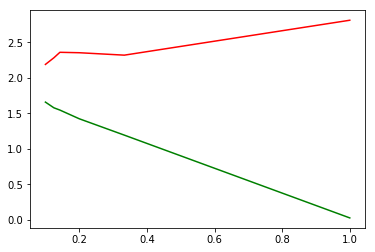

Below are the train error , test error 
[1.6595074014032491] [2.1906825750197023]
Below are the r squared of train and test
-7.89853314507
-11.1718862018
The best value of K for which the error is the least is 1


In [29]:
#KNN Regression using 1,2,9,10,11 predictors x,y,temp,rh,wind 
x_train_ff = x_train.drop(labels=['rain','FFMC','DMC','DC','ISI','day_val','month_val'],axis = 1)
y_train_ff = y_train
x_test_ff = x_test.drop(labels=['rain','FFMC','DMC','DC','ISI','day_val','month_val'],axis = 1)
y_test_ff = y_test
train_errors = list()
test_errors =list()
klist = [1,3,5,7,8,10]
for k in klist:
    neigh = KNeighborsRegressor(k)
    neigh.fit(x_train_ff,y_train_ff)
    y_pred_train = neigh.predict(x_train_ff)
    y_pred_test = neigh.predict(x_test_ff)    
    train_errors.append(mean_squared_error(y_pred_train,y_train_ff))
    test_errors.append(mean_squared_error(y_pred_test,y_test_ff))

#print(train_errors,test_errors)

onebyklist=[1,1/3,1/5,1/7,1/8,1/10]
plt.plot(onebyklist, train_errors,'g')
plt.plot(onebyklist, test_errors,'r')
plt.show()

best_k = 1
train_errors_best = list()
test_errors_best =list()
best = KNeighborsRegressor(best_k)
best.fit(x_train_ff,y_train_ff)
y_pred_train_best = neigh.predict(x_train_ff)
y_pred_test_best = neigh.predict(x_test_ff)    
train_errors_best.append(mean_squared_error(y_pred_train_best,y_train_ff))
test_errors_best.append(mean_squared_error(y_pred_test_best,y_test_ff))
print ("Below are the train error , test error ")
print(train_errors_best,test_errors_best)
print ("Below are the r squared of train and test")
print(r2_score(y_pred_train_best,y_train_ff))
print(r2_score(y_pred_test_best,y_test_ff))

print ("The best value of K for which the error is the least is 1")

# PART J

#Comparison between the best case of KNN Regression and best case Linear Regression
The points of comparison are selected as follows
1. Error measures in the estimation period : For our analysis we will be using mean squared error
2. Error measures in the validation period : For our analysis we will be using mean squared error
3. Residual diagnostics and goodness-of-fit tests: Using R squared value
4. Qualitative considerations: intuitive reasonableness of the model, simplicity of the model, and above all, usefulness for decision making!

KNN Regression:
1. Train Error :    1.66
2. Test Error  :    2.19
3. R-Squared Value :-7.90

Linear Regression :
1. Train Error :     1.84
2. Test Error  :     2.05
3. R-Squared Value : 0.027

Based on the above performance parameters it can be said that Linear Regressions using pair/interaction predictors yield a better result. 